## Simulation sample

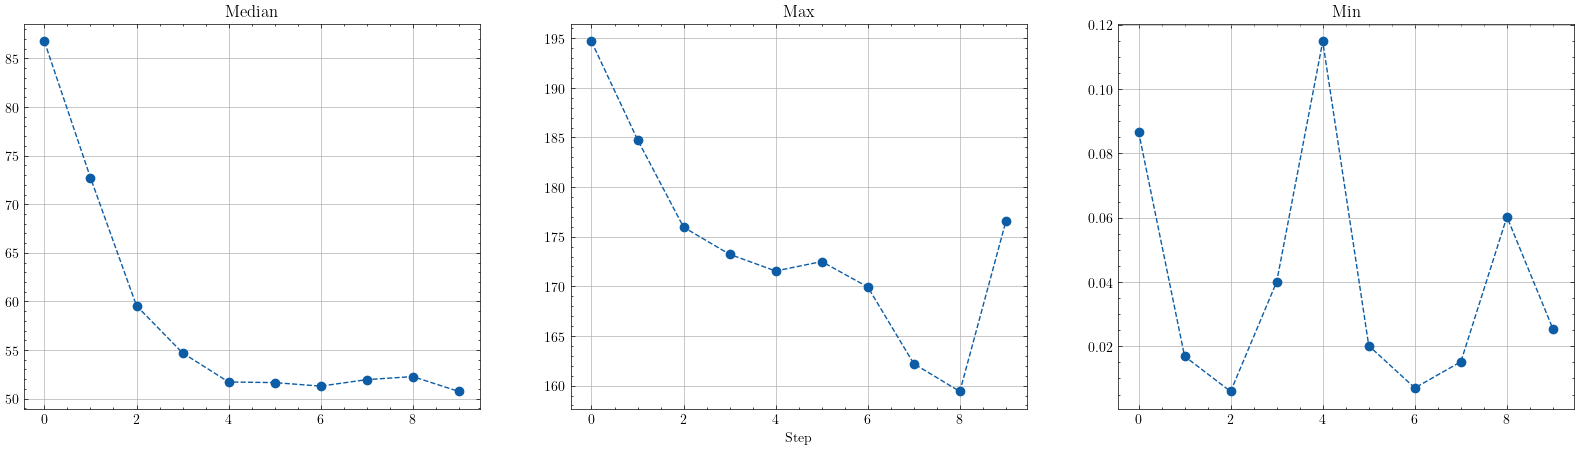

In [2]:
from coordinate_system import HeighVector2D
from rtt_provider import RandomRTTProvider
from simulator import Simulator

simulator = Simulator(60, HeighVector2D(0, 0, 0), RandomRTTProvider(60), 0.25, 0.25)
simulator.run(10, 1)
simulator.plot_error(10)


## Varying the number of neighbours

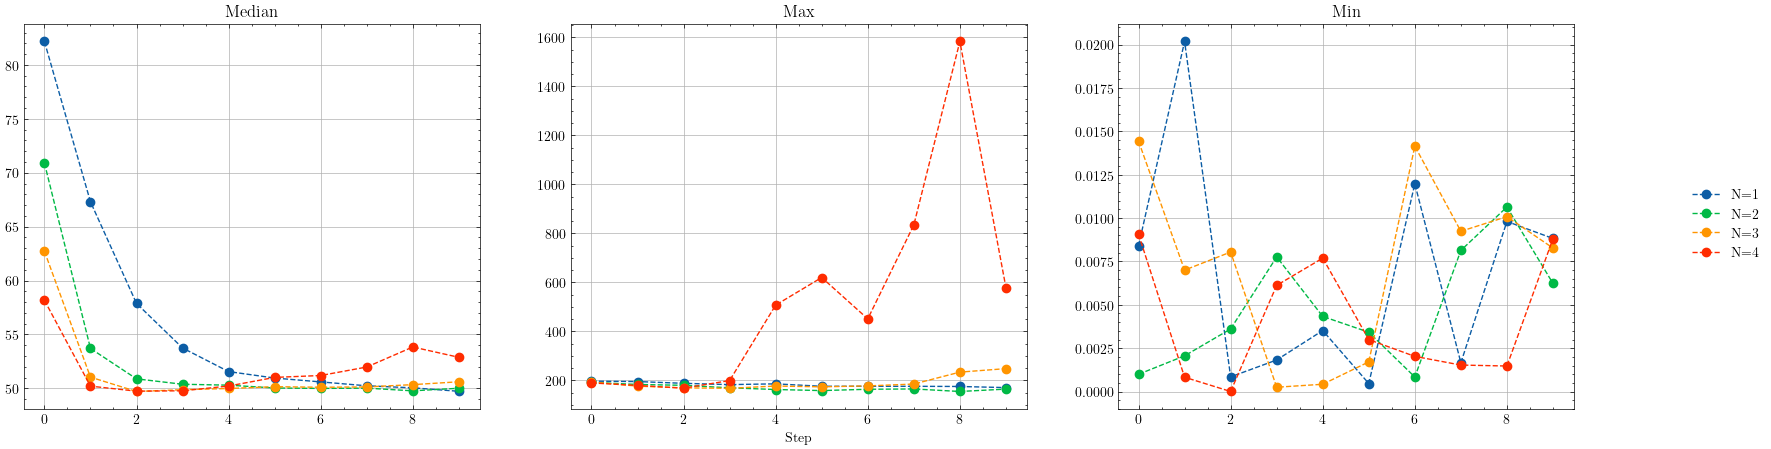

In [36]:
from coordinate_system import HeighVector2D
from simulator import Simulator
import matplotlib.pyplot as plt
import scienceplots

def vary_number_of_neighbours(num_nodes: int, neighbours: list[int] = [1, 2, 3, 4]):

    num_iterations = 10

    with plt.style.context(["science"]):
        fig, axs = plt.subplots(1, 3, figsize = (20,5))
        axs[0].set_title("Median")
        axs[1].set_title("Max")
        axs[2].set_title("Min")
        axs[1].set_xlabel("Step")
        axs[0].grid()
        axs[1].grid()
        axs[2].grid()

        x = list(range(num_iterations))

        for num_neighbours in neighbours:
            simulator = Simulator(num_nodes, HeighVector2D(0, 0, 0), RandomRTTProvider(num_nodes), 0.25, 0.25)
            simulator.run(num_iterations, num_neighbours)
            median_errors, max_errors, min_errors = simulator.get_simulation_errors()

            axs[0].plot(x, median_errors, linestyle = "--", marker = "o", label = f"N={num_neighbours}")
            axs[1].plot(x, max_errors, linestyle = "--", marker = "o", label = f"N={num_neighbours}")
            axs[2].plot(x, min_errors, linestyle = "--", marker = "o", label = f"N={num_neighbours}")

        handles, labels = axs[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='center right')


        plt.show()

vary_number_of_neighbours(200)